In [20]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")
%matplotlib inline


In [21]:
# Load the Dataset
df = pd.read_csv("agriculture_dataset.csv")


In [22]:
# Data Cleaning

# Basic info
df.info()

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with too many nulls or fill them
# Fill with median or mode
df['Fertilizer_Used(tons)'] = df['Fertilizer_Used(tons)'].fillna(df['Fertilizer_Used(tons)'].median())
df['Pesticide_Used(kg)'] = df['Pesticide_Used(kg)'].fillna(df['Pesticide_Used(kg)'].median())

# Fill categorical nulls with mode
df['Irrigation_Type'] = df['Irrigation_Type'].fillna(df['Irrigation_Type'].mode()[0])
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])

# Convert data types if necessary
df['Farm_ID'] = df['Farm_ID'].astype(str)
df['Season'] = df['Season'].astype(str)
df['Soil_Type'] = df['Soil_Type'].astype(str)

# Detect and handle outliers (e.g., Yield, Water_Usage)
df['Yield(tons)'] = df['Yield(tons)'].clip(lower=df['Yield(tons)'].quantile(0.01),
                                           upper=df['Yield(tons)'].quantile(0.99))

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB
Missing values per column:
 Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,254.963800,4.905400,2.398000,27.059690,56724.295600
std,139.417782,2.732689,1.438613,13.334371,27264.992053
min,12.500000,0.500000,0.140000,4.041300,5869.750000
25%,135.710000,2.437500,0.972500,16.190000,37818.152500
50%,281.980000,5.045000,2.330000,28.970000,54097.075000
75%,368.107500,6.885000,3.417500,37.860000,82240.032500
max,483.880000,9.960000,4.990000,47.863200,94754.730000


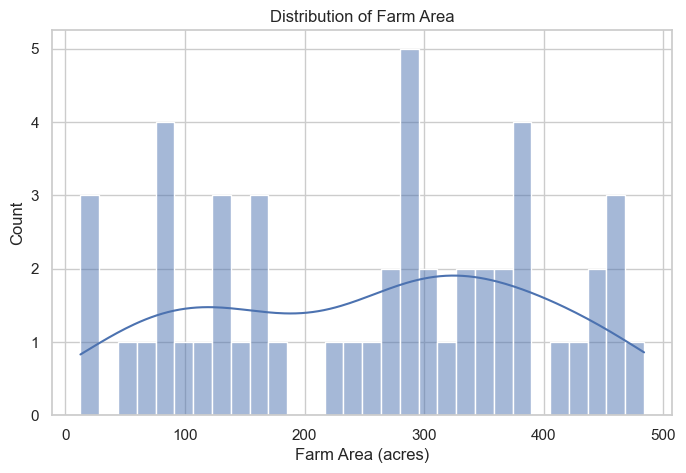

In [23]:
# Data Visualization

# Distribution of farm area
plt.figure(figsize=(8,5))
sns.histplot(df['Farm_Area(acres)'], bins=30, kde=True)
plt.title('Distribution of Farm Area')
plt.xlabel('Farm Area (acres)')
plt.show()


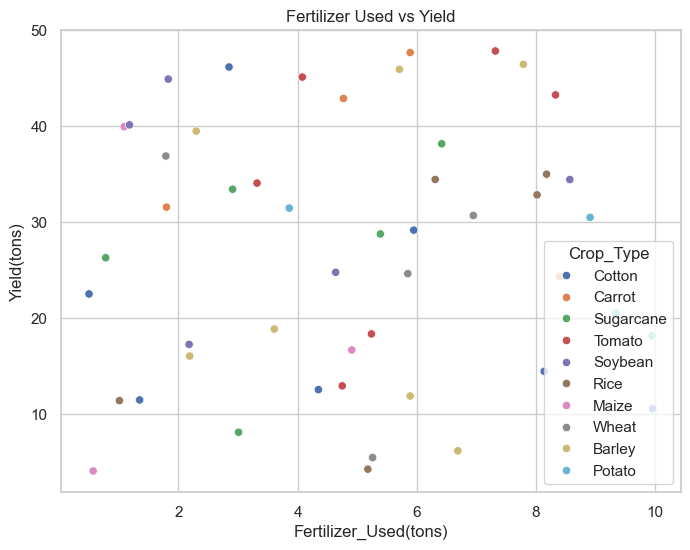

In [24]:
# Scatter plot for Fertilizer vs Yield
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Fertilizer_Used(tons)', y='Yield(tons)', hue='Crop_Type')
plt.title('Fertilizer Used vs Yield')
plt.show()


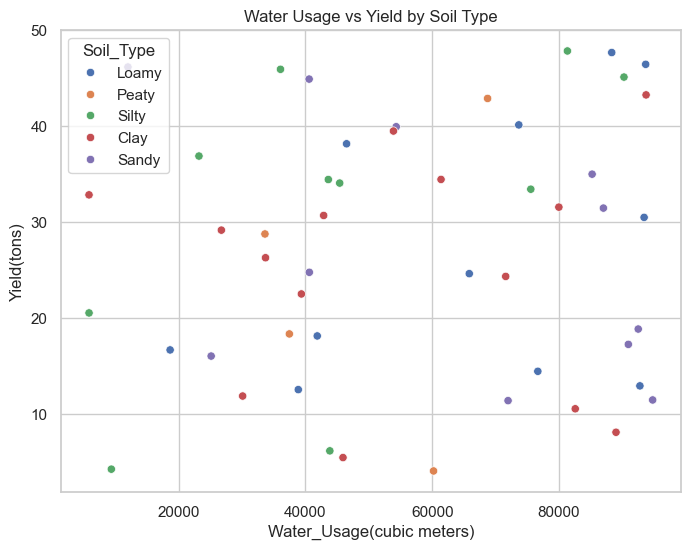

In [25]:
# Scatter plot for Water Usage vs Yield
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Water_Usage(cubic meters)', y='Yield(tons)', hue='Soil_Type')
plt.title('Water Usage vs Yield by Soil Type')
plt.show()


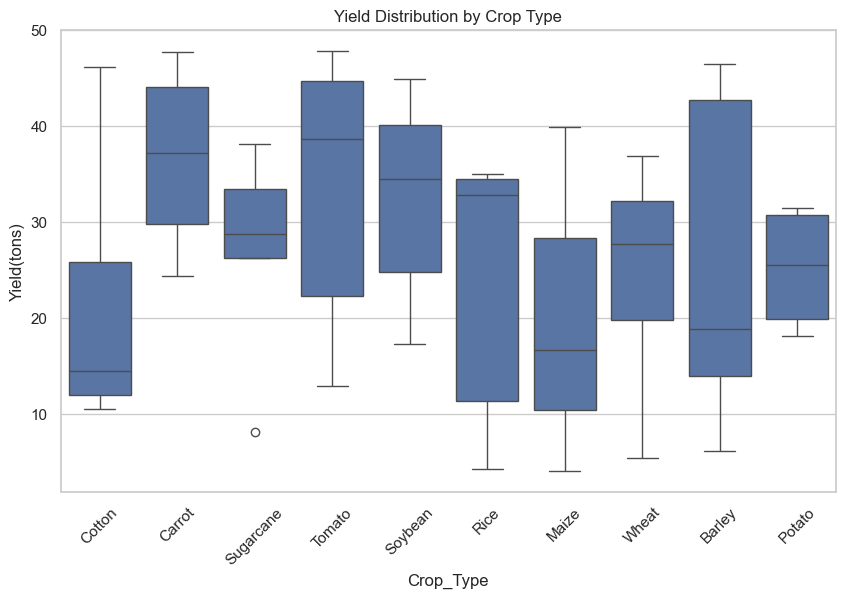

In [26]:
# Boxplot for Yield by Crop Type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Crop_Type', y='Yield(tons)')
plt.xticks(rotation=45)
plt.title('Yield Distribution by Crop Type')
plt.show()


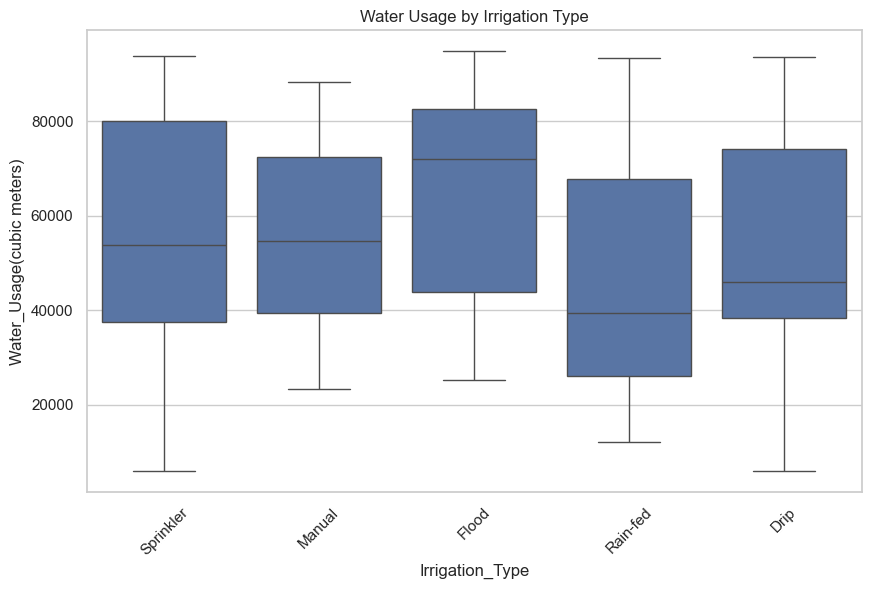

In [27]:
# Boxplot for Water Usage by Irrigation Type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Irrigation_Type', y='Water_Usage(cubic meters)')
plt.xticks(rotation=45)
plt.title('Water Usage by Irrigation Type')
plt.show()


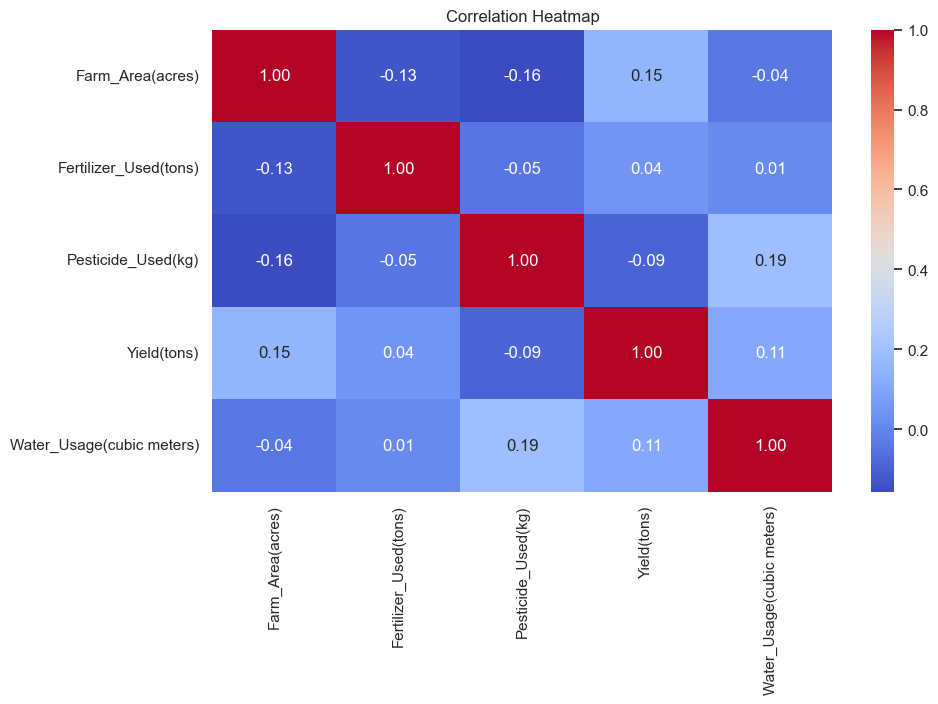

In [28]:
# Heatmap
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


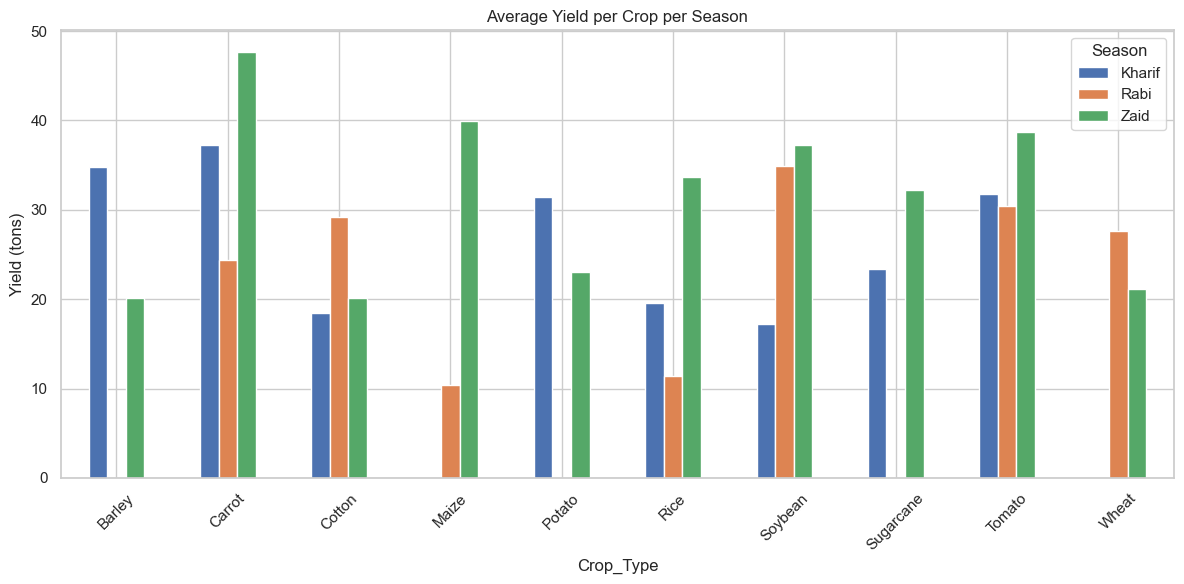

In [29]:
# Average Yield by Crop and Season
pivot = df.groupby(['Crop_Type', 'Season'])['Yield(tons)'].mean().unstack()
pivot.plot(kind='bar', figsize=(12,6))
plt.title('Average Yield per Crop per Season')
plt.ylabel('Yield (tons)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


In [30]:
df.to_csv("farm_data_cleaned.csv", index=False)
